In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision #Visão computacional
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [6]:
transform = transforms.ToTensor() #Definindo a conversão de imagem para tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) # Carrega a parte de treino do dataset
trainloader =  torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Cria u buffer para pegar os dados por partes

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform) #Carrega a parte de Validação
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por partes

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



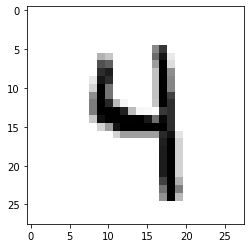

In [12]:
dataiter = iter(trainloader) #representação de um digito le a nossa imagem carregando uma imagem ("trainloader")
imagens, etiquetas = dataiter.next() # pra chama o consulto de imagem 
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

In [13]:
#tamanho da imagem, tamanho do tensor da imagem
print(imagens[0].shape) # Para verificar as dimensões do tensor de cada imagem
print(etiquetas[0].shape) # Para verificar as dimensões do tensor de cada etiqueta que estamos trabalhando

torch.Size([1, 28, 28])
torch.Size([])


In [14]:
class Modelo(nn.Module):
    def _init_(self):
      super(Modelo,self)._init_()
      self.linear1 = nn.Linear(28*28,128) # Camada de entrada, 787 neurônios que se ligam a 128
      self.linear2 = nn.Linear(128, 24) # Camada interna 1, 128 neurônios que se ligam a 64
      self.Linear3 = nn.Linear(64, 10) # Camada interna 2, 64 neurônios que se ligam a 10
      # Para a camada a saída não é necessário definir nada pois só precisamos pegar o output de camada interna 2

      def forward(self, X):
        X = F.relu(self.linear1(X)) # Função de ativação da camada de entrada para camada interna 1
        X = F.relu(self.linear2(X)) # Função de ativação da camada interna 1 para a camada interna 2
        X = self.linear3(X) # Função de ativação da camada interna 2 para a camada de saída, nesse caso f(x) = x
        return F.log_softmax(X, dim=1) # Dados utilizados para calcular a perda

In [15]:
def treino(modelo, trainloader, device):
  otimizador = optim.SGD(modelo.parameters(), lr=0.01, monetum=0.5) # Define a política de atualização dos pesos e da bias 
  inicio = time() #Timer para sabermos quanto tempo levou o treino

  criterio = nn.NLLLoss() #Definindo o critério para calcular a perda
  EPOCHS = 10 # Número de epochs que o algoritmo rodará
  modelo.train() # Ativando o  modo de treinamento do modelo

  for epoch in range(EPOCHS):
    perda_acumulada = 0 # Inicialização da perda acumulada da epoch em questão

    for imagens, etiquetas in trainloader:

      imagens = imagens.view(imagens.shape[0], -1) # Convertendo as imagens para "Vetores" de 28*28 casas para ficarem compatíveis com a otimização
      otimizador.zero_grad() # Zerando os gradientes por conta do ciclo anterior

      output = modelo(imagens.to(device)) # Colocando os dados no modelo
      perda_intantanea = criterio(output, etiquetas.to(device)) # Calculando a perda da epoch em questão

      perda_intantanea.backward() # Back propagation a partir da perda

      otimizador.step() # atualizando os pesos e a bias

      perda_acululada += perda_intantanea.tem() # Atualização da perda acumulada

    else:
      print("Epoch {} - Perda resultant: {}".format(epoch+1, perda_acumulada/len(trainloader)))
    print("\nTempo de treino (em minutos) =", (time()-inicio)/60)      

In [16]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)

Modelo()